In [1]:
import numpy as np
import pandas as pd
import matplotlib as style
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,11,20)

In [3]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [4]:
df.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-19,508.609985,487.570007,492.00000,499.269989,62475300.0,499.269989
2020-11-20,502.500000,489.059998,497.98999,489.609985,32807300.0,489.609985


In [5]:
# How to convert to df to csv

df.to_csv('tsla.csv')

In [6]:
# Use parse_dates=True and index_col=0 to put the date as index

df = pd.read_csv('tsla.csv', parse_dates = True, index_col=0)
df.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-19,508.609985,487.570007,492.00000,499.269989,62475300.0,499.269989
2020-11-20,502.500000,489.059998,497.98999,489.609985,32807300.0,489.609985


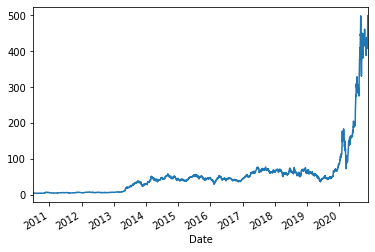

In [7]:
df['Adj Close'].plot()

In [9]:
# Creating a Moving Average
# Use .rolling() per 
# when inplace = True the data is modified in place which means it will reutrn nothing and the df is now updated


df['MA100'] = df['Adj Close'].rolling(window=100).mean()
print(df['MA100'].head())
#df.dropna(inplace = True)
df['MA100'].head()

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
Name: MA100, dtype: float64


Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
Name: MA100, dtype: float64

In [8]:
# Instead of dropna we can use min_periods=0
# doing so the MA will start from day 1 already
df['MA100'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df['MA100'].head()

Date
2010-06-29    4.778000
2010-06-30    4.772000
2010-07-01    4.645333
2010-07-02    4.444000
2010-07-06    4.199600
Name: MA100, dtype: float64

<BarContainer object of 2620 artists>

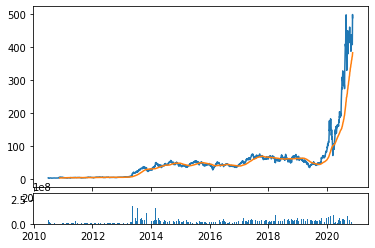

In [18]:
# A chart is called subplot, and it's referred to as axis
# plt.subplot2grid((row,column),(starting point coordinates),

ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan=1 )
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan=1, sharex=ax1 )

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['MA100'])
ax2.bar(df.index, df['Volume'])